We will use the daily spreadsheet from EU CDC containing new cases and deaths per country per day.

In [1]:
!wget -N https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx

--2020-05-26 10:19:26--  https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx
Resolving www.ecdc.europa.eu (www.ecdc.europa.eu)... 2600:9000:21c7:9e00:1d:d83a:40c0:93a1, 2600:9000:21c7:3e00:1d:d83a:40c0:93a1, 2600:9000:21c7:6400:1d:d83a:40c0:93a1, ...
Connecting to www.ecdc.europa.eu (www.ecdc.europa.eu)|2600:9000:21c7:9e00:1d:d83a:40c0:93a1|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘COVID-19-geographic-disbtribution-worldwide.xlsx’ not modified on server. Omitting download.



Get Pandas and NumPy for feature engineering and calculations and get plots inline.

In [2]:
import pandas as pd
import numpy  as np

%matplotlib inline

We read our dataframe directly from the downloaded Excel file and have a look at the first 10 lines for format. Data for Namibia caused missing values because the `geoId` is __NA__, so we disable interpretation of missing values.

In [3]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx', keep_default_na=False, na_values='')
df.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-05-25,25,5,2020,584,2,Afghanistan,AF,AFG,37172386.0,Asia
1,2020-05-24,24,5,2020,782,11,Afghanistan,AF,AFG,37172386.0,Asia
2,2020-05-23,23,5,2020,540,12,Afghanistan,AF,AFG,37172386.0,Asia
3,2020-05-22,22,5,2020,531,6,Afghanistan,AF,AFG,37172386.0,Asia
4,2020-05-21,21,5,2020,492,9,Afghanistan,AF,AFG,37172386.0,Asia
5,2020-05-20,20,5,2020,581,5,Afghanistan,AF,AFG,37172386.0,Asia
6,2020-05-19,19,5,2020,408,4,Afghanistan,AF,AFG,37172386.0,Asia
7,2020-05-18,18,5,2020,262,1,Afghanistan,AF,AFG,37172386.0,Asia
8,2020-05-17,17,5,2020,0,0,Afghanistan,AF,AFG,37172386.0,Asia
9,2020-05-16,16,5,2020,1063,32,Afghanistan,AF,AFG,37172386.0,Asia


Last check of our source dataframe.

In [5]:
df.count()

dateRep                    19248
day                        19248
month                      19248
year                       19248
cases                      19248
deaths                     19248
countriesAndTerritories    19248
geoId                      19248
countryterritoryCode       19052
popData2018                18987
continentExp               19248
pcases                         0
pdeaths                        0
dtype: int64

We pivot to a country by column format.

In [6]:
df_geo = df.pivot(index='dateRep', columns='geoId', values=['cases', 'deaths'])
df_geo

cases                                                         ...  \
geoId         AD     AE     AF   AG   AI    AL     AM   AO     AR    AT  ...   
dateRep                                                                  ...   
2019-12-31   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-01   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-02   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-03   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-04   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
...          ...    ...    ...  ...  ...   ...    ...  ...    ...   ...  ...   
2020-05-21   1.0  941.0  492.0  0.0  0.0  15.0  230.0  2.0  474.0  18.0  ...   
2020-05-22   0.0  894.0  531.0  0.0  0.0   5.0  335.0  6.0  648.0  57.0  ...   
2020-05-23   0.0  994.0  540.0  0.0  0.0  12.0  322.0  2.0  718.0  29.0  ...   
2020-05-24   0.0  812.0  782.0  0.0  0.0   8.0  374.0  0.0  704.0  46.0  ...   
2020-05-25   1.0  781.0  584.0  0.0  0.0   9.0  359.0  9.0  723.0  32.0  ...   

           deaths                                                
geoId          VC   VE   VG   VI   VN   XK   YE    ZA   ZM   ZW  
dateRep                                                          
2019-12-31    NaN  NaN  NaN  NaN  0.0  NaN  NaN   NaN  NaN  NaN  
2020-01-01    NaN  NaN  NaN  NaN  0.0  NaN  NaN   NaN  NaN  NaN  
2020-01-02    NaN  NaN  NaN  NaN  0.0  NaN  NaN   NaN  NaN  NaN  
2020-01-03    NaN  NaN  NaN  NaN  0.0  NaN  NaN   NaN  NaN  NaN  
2020-01-04    NaN  NaN  NaN  NaN  0.0  NaN  NaN   NaN  NaN  NaN  
...           ...  ...  ...  ...  ...  ...  ...   ...  ...  ...  
2020-05-21    0.0  0.0  0.0  0.0  0.0  0.0  1.0  27.0  0.0  0.0  
2020-05-22    0.0  0.0  0.0  0.0  0.0  0.0  4.0  30.0  0.0  0.0  
2020-05-23    0.0  0.0  0.0  0.0  0.0  0.0  0.0  28.0  0.0  0.0  
2020-05-24    0.0  0.0  0.0  0.0  0.0  0.0  6.0  10.0  0.0  0.0  
2020-05-25    0.0  0.0  0.0  0.0  0.0  0.0  3.0  22.0  0.0  0.0  

[147 rows x 420 columns]

For predictions later on we need extra rows in our dataframe. One of the ways to do that is reindexing with a larger range, so we use the current range and add three months and check our latest date.

In [7]:
new_index = pd.date_range(df_geo.index.min(), df_geo.index.min() + pd.Timedelta('365 days'))
df_geo = df_geo.reindex(new_index)
df_geo

cases                                          ... deaths          \
geoId         AD   AE   AF  AG  AI  AL   AM  AO  AR   AT  ...     VC  VE  VG   
2019-12-31   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-01   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-02   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-03   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-04   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
...          ...  ...  ...  ..  ..  ..  ...  ..  ..  ...  ...    ...  ..  ..   
2020-12-26   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2020-12-27   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2020-12-28   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2020-12-29   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2020-12-30   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   

                                         
geoId       VI   VN  XK  YE  ZA  ZM  ZW  
2019-12-31 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-01 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-02 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-03 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-04 NaN  0.0 NaN NaN NaN NaN NaN  
...         ..  ...  ..  ..  ..  ..  ..  
2020-12-26 NaN  NaN NaN NaN NaN NaN NaN  
2020-12-27 NaN  NaN NaN NaN NaN NaN NaN  
2020-12-28 NaN  NaN NaN NaN NaN NaN NaN  
2020-12-29 NaN  NaN NaN NaN NaN NaN NaN  
2020-12-30 NaN  NaN NaN NaN NaN NaN NaN  

[366 rows x 420 columns]

Most algorithms take numerical data as inputs for a model, so we add a column representing the date as days since January 1st, 2019. To access the date values in the index easily, we first create a separate column.

In [8]:
df_geo['daynum'] = (df_geo.index - df_geo.index.min()).days
df_geo['daynum'].describe()

count    366.000000
mean     182.500000
std      105.799338
min        0.000000
25%       91.250000
50%      182.500000
75%      273.750000
max      365.000000
Name: daynum, dtype: float64

Let's start with __IT__, because Italy is already showing a longer tail in the case data. We create a simple dataframe to contain the source values for our fitting algorithm and then expand the data into a one-dimensional vector by repeating the x values by the number of cases for that day. Now the histogram of that data should be our original curve.

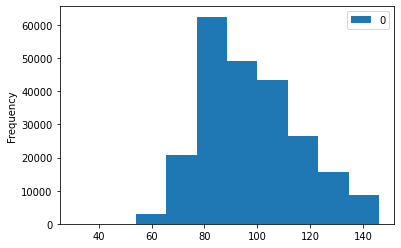

In [20]:
country = 'IT'
measure = 'cases'
pmeasure = 'pcases'

df_pred = pd.DataFrame({'x':df_geo['daynum'], 'y':df_geo[measure][country]})
df_pred = df_pred[df_pred['y'] > 0]
ft_data = np.array(df_pred.astype(int))
xp_data = np.repeat(ft_data[:, 0], ft_data[:, 1])
pd.DataFrame(xp_data).plot(kind='hist')

Now we can use statistical fitting to estimate the curve. From various epidemiological papers the gamma function seems to be a good approximation. It is available in the `scipy` package. A Gamma distribution is described by three parameters and we can use `stats` to get the 4 moments of the distribution.

In [21]:
import scipy.stats as stats

alpha, loc, scale = stats.gamma.fit(xp_data)
print(alpha, loc, scale, len(xp_data))

mean, var, skew, kurt = stats.gamma.stats(alpha, loc, scale, 'mvsk')
print(mean, var, skew, kurt)

13.680133544513108 30.387056037039265 4.887809984037739 229858
97.25294935888002 326.82778097009566 0.5407354311056984 0.43859220967959833


The `pdf` function takes the results of `fit` and applies them to input data.

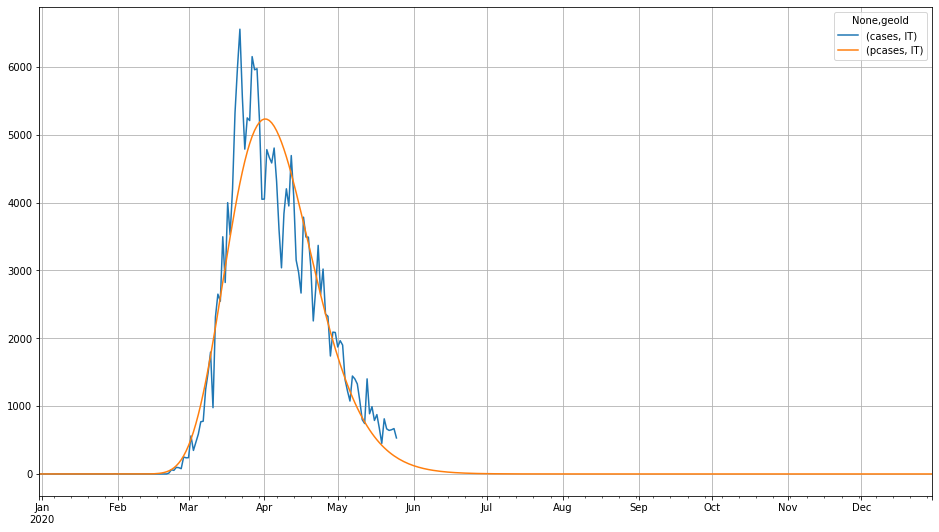

In [22]:
df_geo[(pmeasure, country)] = stats.gamma.pdf(df_geo['daynum'], alpha, loc, scale) * len(xp_data)
df_geo[[(measure, country), (pmeasure, country)]].plot(figsize=(16, 9), grid=True)

Now that we have a curve fitted, we can see where the cumulative number will end up if none of our assumptions change, which is rarely the case.

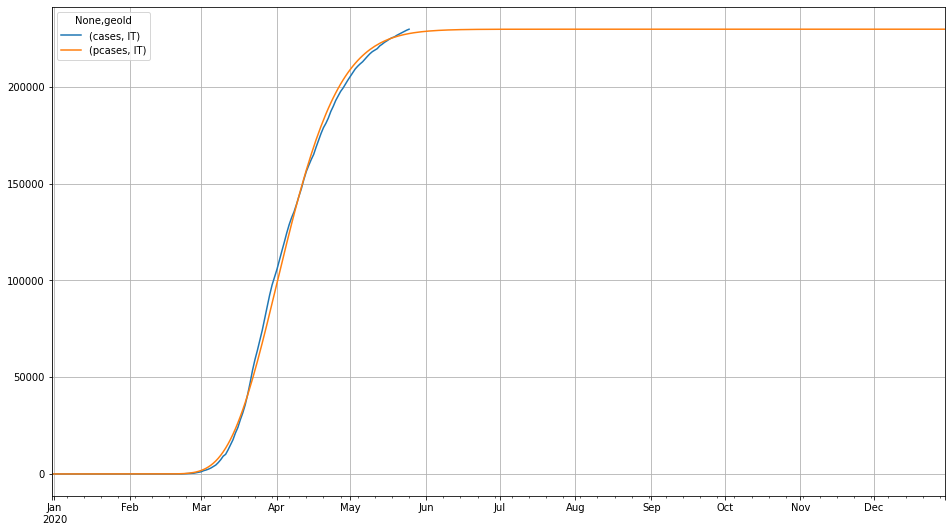

In [23]:
df_geo[[(measure, country), (pmeasure, country)]].cumsum().plot(figsize=(16, 9), grid=True)

Keep exploring! Stay home, wash your hands, keep your distance.